In [37]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

ds = pd.read_csv('main_property_data.csv')

ds.drop_duplicates(inplace=True)
ds.rename(columns={'Type of property': 'type'}, inplace=True)
ds.rename(columns={'Subtype of property': 'subtype'}, inplace=True)
ds.rename(columns={'Price of property in euro': 'price'}, inplace=True)
ds.rename(columns={'Number of bedrooms': 'bedrooms'}, inplace=True)
ds.drop('Raw num:', inplace=True, axis=1)
'''ds.fillna(0, inplace=True)
'''
ds.head()
ds['price'].max()

11000000.0

(1.0, 15.0)

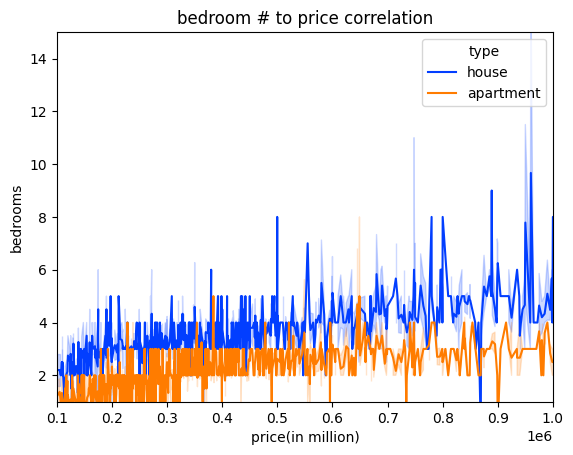

In [31]:
graph = sns.lineplot(x='price', y='bedrooms', data=ds, hue='type', palette='bright')
graph.set(xlabel = 'price(in million)', ylabel = 'bedrooms', title= 'bedroom # to price correlation')
graph.set_xlim(100000, 1000000)
graph.set_ylim(1, 15)

(0.0, 500.0)

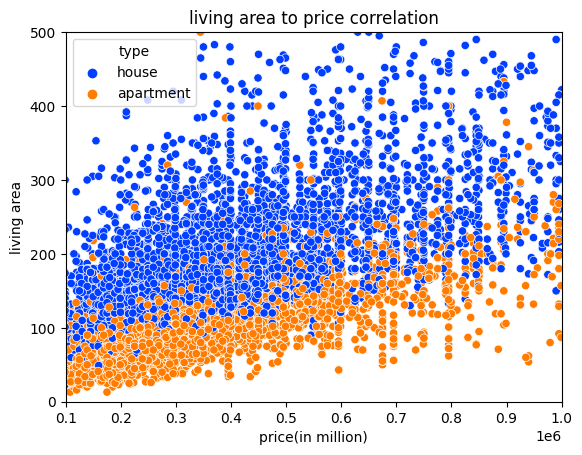

In [32]:
graph = sns.scatterplot(x='price', y='Living area', data=ds, hue='type', palette='bright')
graph.set(xlabel = 'price(in million)', ylabel = 'living area', title= 'living area to price correlation')
graph.set_xlim(100000, 1000000)
graph.set_ylim(0, 500)

(50000.0, 900000.0)

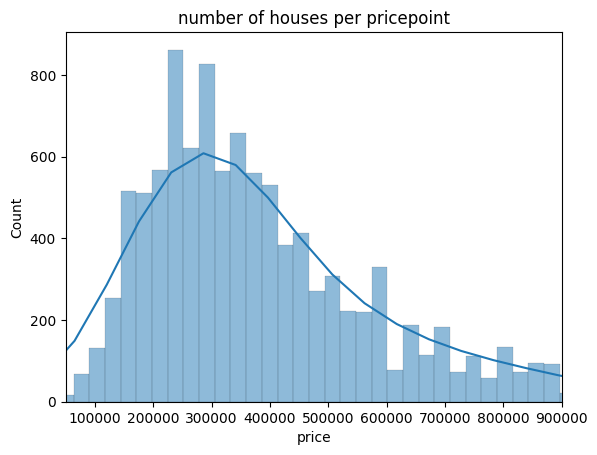

In [33]:
graph = sns.histplot(ds['price'], kde=True)
graph.set(title='number of houses per pricepoint')
graph.set_xlim(50000, 900000)

[Text(0, 0, 'house'),
 Text(1, 0, 'exceptional property'),
 Text(2, 0, 'villa'),
 Text(3, 0, 'mansion'),
 Text(4, 0, 'apartment'),
 Text(5, 0, 'penthouse'),
 Text(6, 0, 'duplex'),
 Text(7, 0, 'loft'),
 Text(8, 0, 'mixed use building'),
 Text(9, 0, 'flat studio'),
 Text(10, 0, 'apartment block'),
 Text(11, 0, 'town house'),
 Text(12, 0, 'country cottage'),
 Text(13, 0, 'service flat'),
 Text(14, 0, 'bungalow'),
 Text(15, 0, 'ground floor'),
 Text(16, 0, 'triplex'),
 Text(17, 0, 'kot'),
 Text(18, 0, 'castle'),
 Text(19, 0, 'other property'),
 Text(20, 0, 'chalet'),
 Text(21, 0, 'manor house'),
 Text(22, 0, 'farmhouse')]

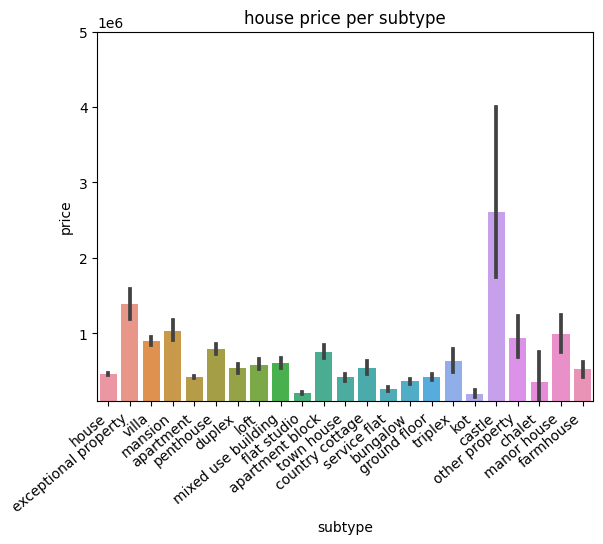

In [47]:
graph = sns.barplot(x='subtype', y='price', data=ds)
graph.set(title='house price per subtype')
graph.set_ylim(100000, 5000000)
graph.set_xticklabels(graph.get_xticklabels(), rotation=40, ha='right')